## Missing Data Imputation 
##### Backward and mean filling

- Geriye dogru doldurma yonteminde veri setindeki eksik veri satiri geriye dogru ilerleyerek kendisinden sonra gelen en yakin veri degeri ile doldurulur.
- Ortalama ile doldurma da ise NaN olmayan veri gruplarinin ortalamasi alinir ve NaN olan degerlere atanir.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [46]:
data = pd.read_csv("perth_house.csv")
data.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [47]:
data = data.drop(columns=["ADDRESS","SUBURB"])
data.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


- Sayisal ilk 7 sutun'un islenecegi dusunuldugunde dataframe buna uygun filtrelendi.

In [48]:
data = data.iloc[:,:7]

In [49]:
data.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
0,565000,4,2,2.0,600,160,2003.0
1,365000,3,2,2.0,351,139,2013.0
2,287000,3,1,1.0,719,86,1979.0
3,255000,2,1,2.0,651,59,1953.0
4,325000,4,1,2.0,466,131,1998.0


In [50]:
print(data.isna().sum())
data.tail()

PRICE            0
BEDROOMS         0
BATHROOMS        0
GARAGE        2478
LAND_AREA        0
FLOOR_AREA       0
BUILD_YEAR    3155
dtype: int64


,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
33651,1040000,4,3,2.0,292,245,2013.0
33652,410000,3,2,2.0,228,114,NaN
33653,427000,3,2,2.0,261,112,NaN
33654,295000,3,1,2.0,457,85,1974.0
33655,295000,3,1,2.0,296,95,NaN


In [51]:
data.corr

<bound method DataFrame.corr of          PRICE  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR
0       565000         4          2     2.0        600         160      2003.0
1       365000         3          2     2.0        351         139      2013.0
2       287000         3          1     1.0        719          86      1979.0
3       255000         2          1     2.0        651          59      1953.0
4       325000         4          1     2.0        466         131      1998.0
...        ...       ...        ...     ...        ...         ...         ...
33651  1040000         4          3     2.0        292         245      2013.0
33652   410000         3          2     2.0        228         114         NaN
33653   427000         3          2     2.0        261         112         NaN
33654   295000         3          1     2.0        457          85      1974.0
33655   295000         3          1     2.0        296          95         NaN

[33656 rows x 7 col

In [52]:
data.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
count,3.365600e+04,33656.000000,33656.000000,31178.000000,33656.000000,33656.000000,30501.000000
mean,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436
std,3.558256e+05,0.752038,0.587427,1.365225,16693.513215,72.102982,20.964330
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000
25%,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1978.000000
50%,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1995.000000
75%,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2005.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2017.000000


In [53]:
data = data.sort_values("PRICE",ascending=True).iloc[:]
data.head()

## veriler artan bir sekilde siralandi bu sayede backward filling daha uygun sekilde yapilabilir.

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
12509,51000,4,2,2.0,960,227,NaN
18489,52000,3,2,2.0,20058,188,1990.0
23030,53000,3,1,2.0,245,150,2001.0
21098,54500,4,2,2.0,704,174,1999.0
19042,54500,4,2,3.0,90527,274,2011.0


###### 'bfill' atamasi ile geriye dogru yapilacagi bildirildi. BUILD_YEAR sutunundaki 3155 NaN veri bfill ile dolduruldu.

In [54]:
data['BUILD_YEAR'] = data['BUILD_YEAR'].fillna(method='bfill')

In [55]:
data.head()

#### Goruldugu uzere 12509.satirdaki veri kendisinden sonra gelen en yakin veri olan 1990 ile dolduruldu

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR
12509,51000,4,2,2.0,960,227,1990.0
18489,52000,3,2,2.0,20058,188,1990.0
23030,53000,3,1,2.0,245,150,2001.0
21098,54500,4,2,2.0,704,174,1999.0
19042,54500,4,2,3.0,90527,274,2011.0


In [56]:
data.isna().sum()

##### Artik BUILD_YEAR sutununda NaN deger yok.

PRICE            0
BEDROOMS         0
BATHROOMS        0
GARAGE        2478
LAND_AREA        0
FLOOR_AREA       0
BUILD_YEAR       0
dtype: int64

###### Garage sutununda bulunan 2478 NaN veri ayni sutunun NaN olmayan degerlerinin ortalamasi ile dolduruluyor.

In [65]:
data["GARAGE"] = round(data['GARAGE'].fillna(data["GARAGE"].mean()))

In [66]:
data.isna().sum()

PRICE         0
BEDROOMS      0
BATHROOMS     0
GARAGE        0
LAND_AREA     0
FLOOR_AREA    0
BUILD_YEAR    0
dtype: int64

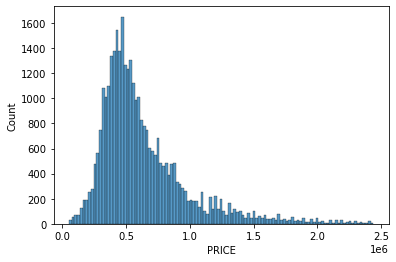

<AxesSubplot:xlabel='BUILD_YEAR', ylabel='PRICE'>

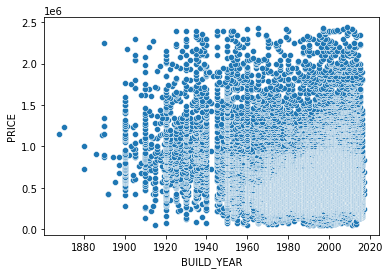

In [67]:
sbn.histplot(data["PRICE"])
plt.show()
sbn.scatterplot(y=data["PRICE"],x=data["BUILD_YEAR"])